# ПРОВЕРКА ГИПОТЕЗ

В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

## Задания  
1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.  
2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.  
3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.  
4. Проанализируйте CTR с разбивкой по рекламной кампании.  
5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости.  
6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.   
7. Посчитайте конверсию из клика в покупку.  

## Описание данных

· ad_id – идентификатор объявления (рекламы)  
· xyz_campaign_id – идентификатор рекламной кампании в базе компании X  
· fb_campaign_id – идентификатор кампании в Facebook  
· age – возрастная группа, которой показывалась реклама  
· gender – пол тех, кому показывалась реклама  
· interest –**код, указывающий категорию**, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 –       животные, 2 – автомобили, 3 – тортики и т.д.)  
· impressions – число показов  
· clicks – число кликов  
· spent – сумма, которую компания потратила на показ объявления   
· total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы  
· approved_conversion – количество людей, которые купили продукт после просмотра рекламы  

In [ ]:
### 1

Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(12, 6)}, style='whitegrid')

In [6]:
conv = pd.read_csv('conversion2.csv')

In [7]:
conv.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [68]:
conv.shape

(1143, 11)

In [69]:
p=conv.dropna()
len(p)

1143

In [56]:
conv.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
conv.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [8]:
conv.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных.

https://kurst.org/blocks/variable-type
clicks - дискретная  
age - ранговая-Известен начальный(0) и конечный возраст 
gender - категориальная  
spent - непрерывная   
impressions - дискретная  
approved_conversion - дискретная  
interest - Не дискретная, категориальная
total_conversion - дискретная  

### 2

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

Hint: np.log()

· Распределение симметричное  
· Полученное распределение является нормальным  
· __Распределение бимодальное__   
· __Полученное распределение не является нормальным__    
· Распределение унимодальное  

In [27]:
conv[['xyz_campaign_id','Impressions']].groupby(['xyz_campaign_id'],as_index=False).sum()

,xyz_campaign_id,Impressions
0,916,482925
1,936,8128187
2,1178,204823716


In [21]:
print(conv["Impressions"].max(),conv["Impressions"].min())

3052003 87


691


<Axes: xlabel='Impressions', ylabel='Count'>

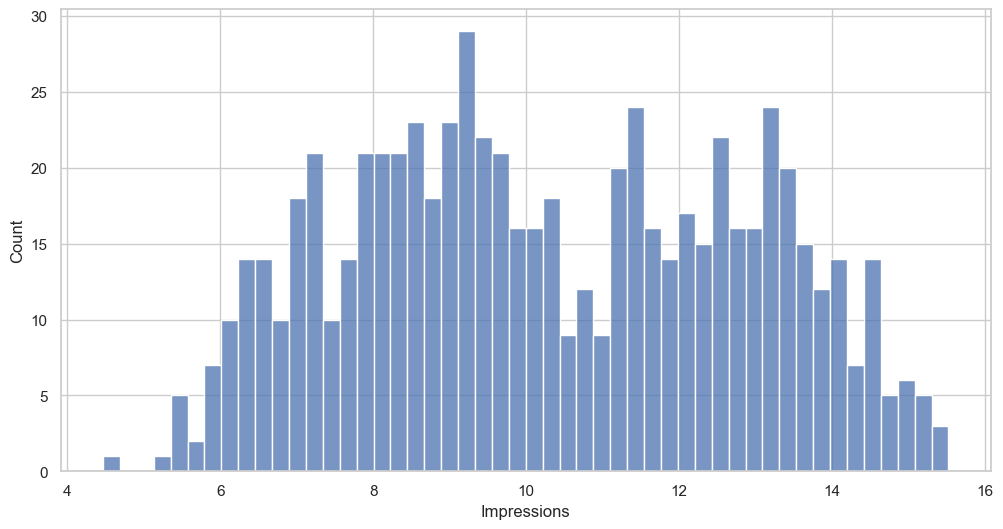

In [21]:
a=np.log(conv.groupby('fb_campaign_id')["Impressions"].sum())
print(len(a))
sns.histplot(x=a, bins=50)

In [7]:
conv_gr=conv[['xyz_campaign_id','fb_campaign_id','Impressions']].groupby(['xyz_campaign_id','fb_campaign_id'],as_index=False).sum()
conv_gr["Imp_log"]=np.log(conv_gr["Impressions"])
conv_gr

,xyz_campaign_id,fb_campaign_id,Impressions,Imp_log
0,916,103916,7350,8.902456
1,916,103917,17861,9.790375
2,916,103920,693,6.541030
3,916,103928,8392,9.035034
4,916,103929,1915,7.557473
...,...,...,...,...
686,1178,179977,1129773,13.937527
687,1178,179978,637549,13.365386
688,1178,179979,151531,11.928546
689,1178,179981,790253,13.580108


<Axes: xlabel='Imp_log', ylabel='Count'>

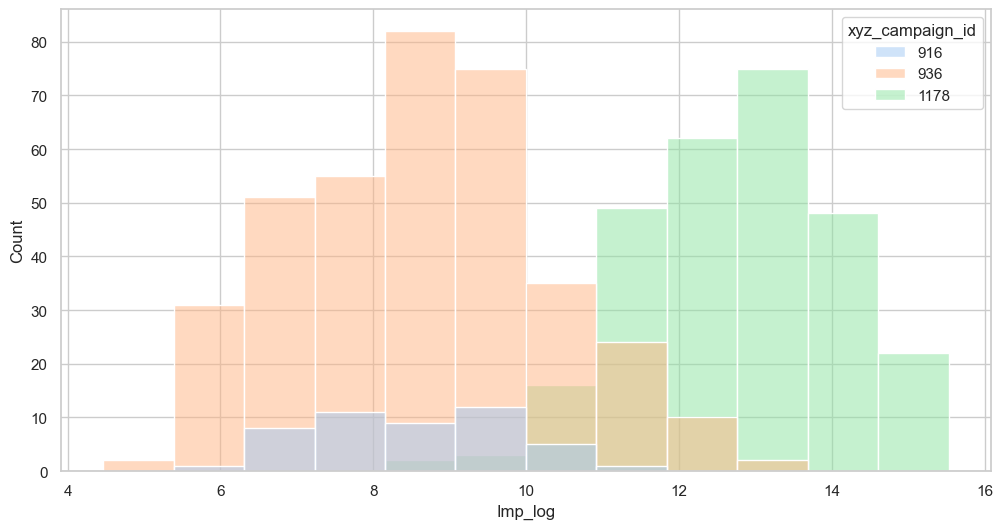

In [8]:
sns.histplot(data=conv_gr,x="Imp_log", hue='xyz_campaign_id', palette="pastel")

In [46]:
features=conv[['xyz_campaign_id','fb_campaign_id','Impressions']].copy()
from scipy.cluster.hierarchy import dendrogram, linkage

In [49]:
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()
features = autoscaler.fit_transform(features)
linked = linkage(features, method = 'ward') 

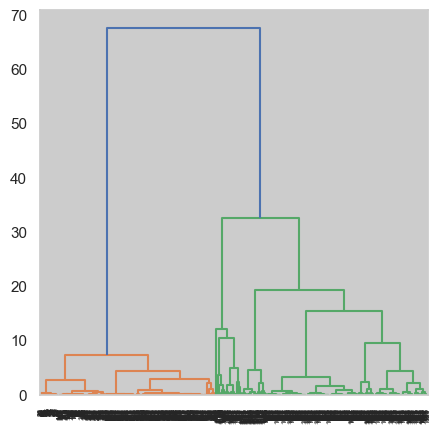

In [52]:
plt.figure(figsize=(5, 5))  

dendrogram(linked, orientation='top')

plt.show() 

**Распределение бимодальное**

### 3

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.


Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите **ad_id объявления с наибольшим CTR**.

In [55]:
conv['ctr'] = conv["Clicks"] / conv['Impressions']

In [56]:
conv['ctr'].describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

Min-0, есть объявления на которые никто не кликал =(

In [58]:
conv['ctr'].idxmax()

150

In [59]:
conv['ad_id'].iloc[conv['ctr'].idxmax()]

738637

### 4

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 
Какому графику соответствует распределение CTR кампании 916?

Note: параметр bins=20.

<Axes: xlabel='ctr', ylabel='Count'>

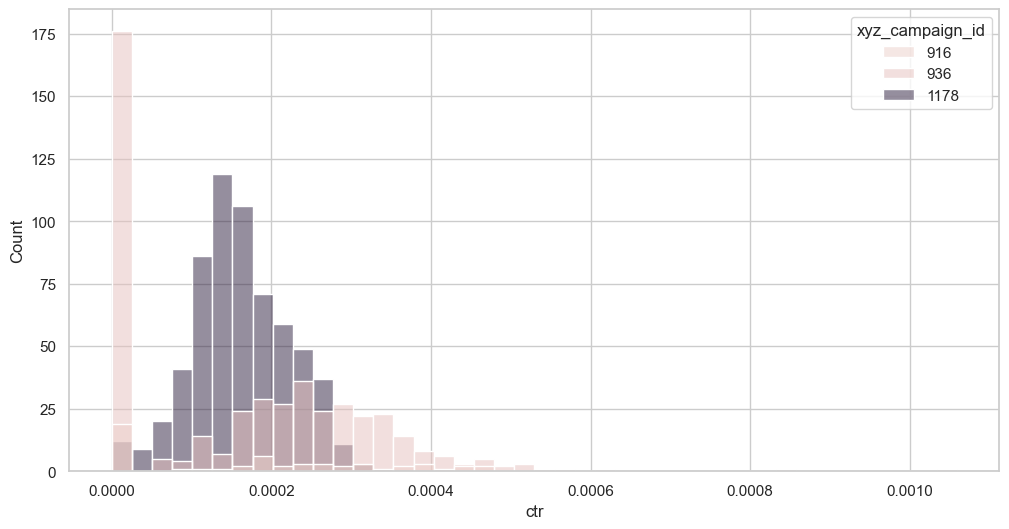

In [61]:
sns.histplot(data=conv,x='ctr', hue='xyz_campaign_id')

### 5

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:


Выведите описательные статистики для новой переменной, посмотрите на форму распределения. 

In [8]:
conv['cpc'] = conv['Spent'] / conv['Clicks']

In [71]:
conv['cpc'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [ ]:
#Межквартильный размах ( IQR ) — это разница между 75-м и 25-м процентилем данных.
#Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [87]:
round(sts.iqr(conv['cpc'], nan_policy='omit'), 2)

0.25

### 6

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

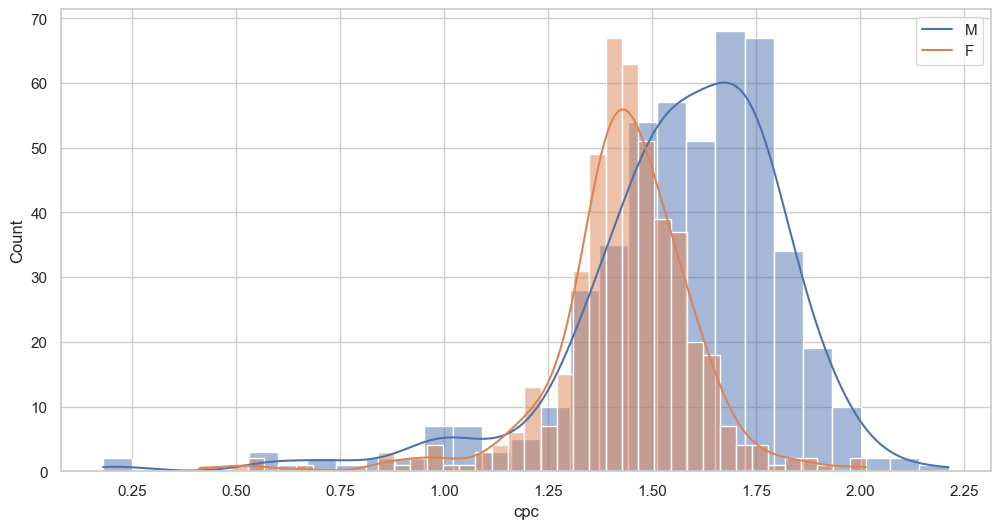

In [15]:
#.dropna()
sns.histplot(data=conv.query("gender=='M'"),x='cpc', kde=True)
sns.histplot(data=conv.query("gender=='F'"),x='cpc',kde=True)
plt.legend(['M',  'F'])

### 7

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [69]:
conv['cr_app'] = (conv["Approved_Conversion'"]/ conv["Clicks"]).mul(100)

In [71]:
round(conv.query('ad_id == 1121814')['cr_app'], 2)

860    3.09
Name: cr_app, dtype: float64